In [3]:
import requests
from bs4 import BeautifulSoup

In [4]:
session = requests.Session()
travian_url = 'https://tse.asia.travian.com'

In [5]:
username = ''
password = ''

### 登入遊戲

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html id="mainLayout" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <title>
   Shadow Empires - ASIA - 1x
  </title>
  <meta content="max-age=0" http-equiv="cache-control"/>
  <meta content="no-cache" http-equiv="pragma"/>
  <meta content="0" http-equiv="expires"/>
  <meta content="no" http-equiv="imagetoolbar"/>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="en-US" name="content-language"/>
  <meta content="width=device-width" name="viewport"/>
  <link href="//gpack.travian.com/0134461a/mainPage/lang/en-US/compact.css" rel="stylesheet" type="text/css"/>
  <link href="//gpack.travian.com/0134461a/mainPage/lang/en-US/lang.css" rel="stylesheet" type="text/css"/>
  <script id="Cookiebot" src="https://consent.cookiebot.com/uc.js?cbid=d8ef0137-9d41-4ab0-aae5-79eb202109a7&amp;framework=IAB" type="text/javascript">
  </script>
  <
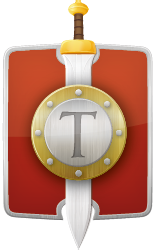

In [7]:
response = session.get(f'{travian_url}/login.php')
soup = BeautifulSoup(response.text)
print(soup.prettify())

In [38]:
login_num = soup.find('input', attrs={'name':'login'}).attrs['value']

In [40]:
post_data = {'name': username, 'password': password, 's1': 'Login',
             'w': '1440:900', 'login': login_num}
session.post(f'{travian_url}/login.php', data=post_data)
# soup = BeautifulSoup(response.text)

<Response [200]>

### 獲取bid頁面

In [41]:
# 獲取bid頁面
response = session.get(f'{travian_url}/hero.php?t=4')
soup = BeautifulSoup(response.text)

In [8]:
# 刷新bid頁面
response = session.get(f'{travian_url}/hero.php?t=4&reload=auto')
soup = BeautifulSoup(response.text)

In [74]:
bid_table = soup.find('table')
bid_tbody = bid_table.find('tbody')
bid_trs = bid_tbody.find_all('tr')
for bid_tr in bid_trs:
    print(bid_tr.find(class_='name').text.strip().replace('\u202d\u202d', '').split('\u202c×\u202c'))
    print(bid_tr.find(class_='bids').text.strip())
    print(bid_tr.find(class_='silver').text.strip())

['5', ' Ointment']
4
201
['5', ' Ointment']
4
201
['5', ' Ointment']
3
200
['5', ' Ointment']
3
200
['10', ' Small Bandage']
12
112
['1', ' Helmet of the Horseman']
14
755
['5', ' Cage']
6
1400
['10', ' Cage']
6
2001
['1', ' Short Bow of the Resheph Chariot']
4
3314
['10', ' Ointment']
5
303
['1', ' Book of Wisdom']
6
1000
['5', ' Small Bandage']
2
11
['10', ' Cage']
5
2000
['5', ' Cage']
5
1000
['10', ' Small Bandage']
0
10
['5', ' Cage']
5
1000
['10', ' Ointment']
2
300
['10', ' Ointment']
2
300
['5', ' Cage']
3
300
['1', ' Book of Wisdom']
2
538


In [87]:
for bid_tr in bid_trs:
    amount, name = bid_tr.find(class_='name').text.strip().split('\u202c×\u202c')
    amount = int(amount.replace('\u202d\u202d', '').strip())
    name = name.strip()
    bids = bid_tr.find(class_='bids').text.strip()
    silver = int(bid_tr.find(class_='silver').text.strip())
    silver_unit = silver / amount
    time = bid_tr.find(class_='timer').attrs['value']
    print(f'時間:{time}, 數量:{amount}, 產品:{name}, 單價:{silver_unit}')


時間:166, 數量:5, 產品:Ointment, 單價:40.2
時間:670, 數量:5, 產品:Ointment, 單價:40.2
時間:1339, 數量:5, 產品:Ointment, 單價:40.0
時間:1588, 數量:5, 產品:Ointment, 單價:40.0
時間:1939, 數量:10, 產品:Small Bandage, 單價:11.2
時間:2380, 數量:1, 產品:Helmet of the Horseman, 單價:755.0
時間:2536, 數量:5, 產品:Cage, 單價:280.0
時間:3077, 數量:10, 產品:Cage, 單價:200.1
時間:3249, 數量:1, 產品:Short Bow of the Resheph Chariot, 單價:3314.0
時間:3816, 數量:10, 產品:Ointment, 單價:30.3
時間:4398, 數量:1, 產品:Book of Wisdom, 單價:1000.0
時間:4425, 數量:5, 產品:Small Bandage, 單價:2.2
時間:5587, 數量:10, 產品:Cage, 單價:200.0
時間:5753, 數量:5, 產品:Cage, 單價:200.0
時間:5841, 數量:10, 產品:Small Bandage, 單價:1.0
時間:5868, 數量:5, 產品:Cage, 單價:200.0
時間:6416, 數量:10, 產品:Ointment, 單價:30.0
時間:6556, 數量:10, 產品:Ointment, 單價:30.0
時間:6759, 數量:5, 產品:Cage, 單價:60.0
時間:7236, 數量:1, 產品:Book of Wisdom, 單價:538.0


In [16]:
# print(soup.prettify())
print()

None
